#### This code fetches historical stock data for AMD, Intel, and Nvidia, creates a portfolio DataFrame, calculates its value and daily percentage change, filters it for market open dates, and rounds values for consistency before displaying the data.

#### In this code, we utilize Matplotlib to plot the performance of our portfolio over the last five years. We plot the portfolio unit price against the date, showcasing how the value of our portfolio has evolved over time. The resulting graph provides a visual representation of our portfolio's performance, aiding in analysis and decision-making. We then created a JPEG of the plot.

In [1]:
import pandas as pd
import yfinance as yf
from pandas.tseries.offsets import CustomBusinessDay

# Define the symbol for SOXX ETF
symbols = ['SOXX']

# Calculate the end date as today
end_date = pd.Timestamp.today().strftime('%Y-%m-%d')

# Calculate the start date as 5 years before the end date
start_date = (pd.Timestamp.today() - pd.DateOffset(years=5)).strftime('%Y-%m-%d')

# Fetch historical stock data for SOXX ETF
stock_data = yf.download(symbols, start=start_date, end=end_date)['Adj Close']

# Create a DataFrame for the portfolio
portfolio_df = pd.DataFrame(stock_data)

# Rename columns to include stock symbol
portfolio_df.columns = symbols

# Add a column for the number of shares (assuming 1000 shares for simplicity)
portfolio_df['Shares_SOXX'] = 1000

# Calculate the value of the portfolio in USD
portfolio_df['Portfolio_Value'] = (portfolio_df['SOXX'] * portfolio_df['Shares_SOXX'])

# Calculate the portfolio unit price in USD
portfolio_df['Portfolio_Close_Price'] = (portfolio_df['Portfolio_Value'] / 1000)

# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Close_Price'].pct_change()

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

# Define a custom business day object for Monday to Friday
monday_to_friday_bday = CustomBusinessDay(weekmask='Mon Tue Wed Thu Fri')

# Generate a date range using the custom business day object
market_open_dates = pd.date_range(start=start_date, end=end_date, freq=monday_to_friday_bday)

# Filter the data to include only market open dates
portfolio_df = portfolio_df[portfolio_df.index.isin(market_open_dates)]

# Round the portfolio value columns to 2 decimal places
portfolio_df = portfolio_df.round({'SOXX': 2, 'Portfolio_Value': 2, 'Portfolio_Close_Price': 2})

# Print the first few rows of the portfolio DataFrame
display(portfolio_df.head())
display(portfolio_df.tail())

[*********************100%%**********************]  1 of 1 completed


,SOXX,Shares_SOXX,Portfolio_Value,Portfolio_Close_Price,Daily_Return_Percentage
Date,,,,,
2019-04-03,56.66,1000,56664.28,56.66,0.022101
2019-04-04,56.79,1000,56786.81,56.79,0.002162
2019-04-05,57.20,1000,57197.13,57.20,0.007226
2019-04-08,57.33,1000,57331.05,57.33,0.002341
2019-04-09,56.74,1000,56735.53,56.74,-0.010387


,SOXX,Shares_SOXX,Portfolio_Value,Portfolio_Close_Price,Daily_Return_Percentage
Date,,,,,
2024-03-25,224.57,1000,224570.01,224.57,-0.003903
2024-03-26,222.88,1000,222880.00,222.88,-0.007526
2024-03-27,225.68,1000,225679.99,225.68,0.012563
2024-03-28,225.92,1000,225920.00,225.92,0.001063
2024-04-01,228.30,1000,228300.00,228.30,0.010535


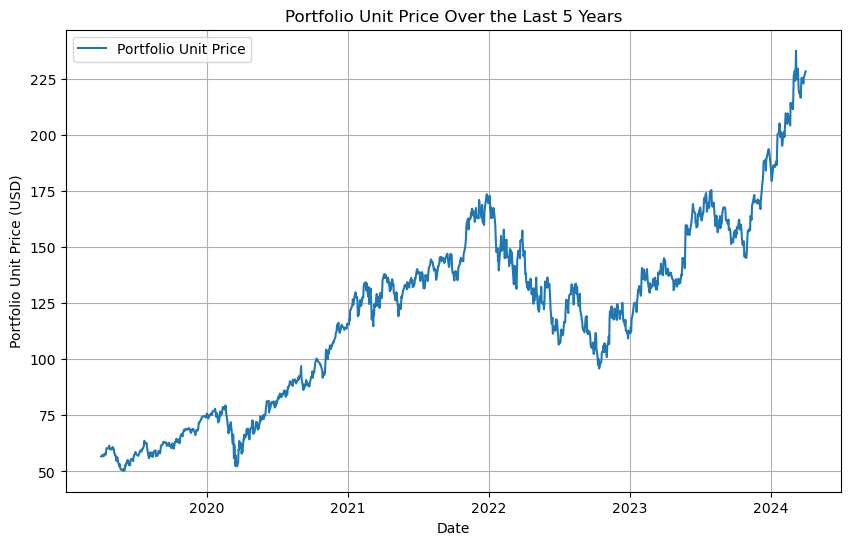

In [2]:
import matplotlib.pyplot as plt

# Plot the portfolio value for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Portfolio_Close_Price'], label='Portfolio Unit Price')
plt.title('Portfolio Unit Price Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Portfolio Unit Price (USD)')
plt.legend()
plt.grid(True)

# Save the plot as a JPEG file
plt.savefig('portfolio_unit_price.jpeg', dpi=300, bbox_inches='tight')

plt.show()

#### In this segment, we calculate the daily percentage change in the portfolio value and visualize it over the last five years. By computing the percentage change in the portfolio's unit price on a daily basis, we gain insights into the volatility and trends of our portfolio's performance. The resulting plot provides a clear depiction of the daily fluctuations in our portfolio's value, aiding in risk assessment and investment strategy evaluation. We then created a JPEG of the plot.

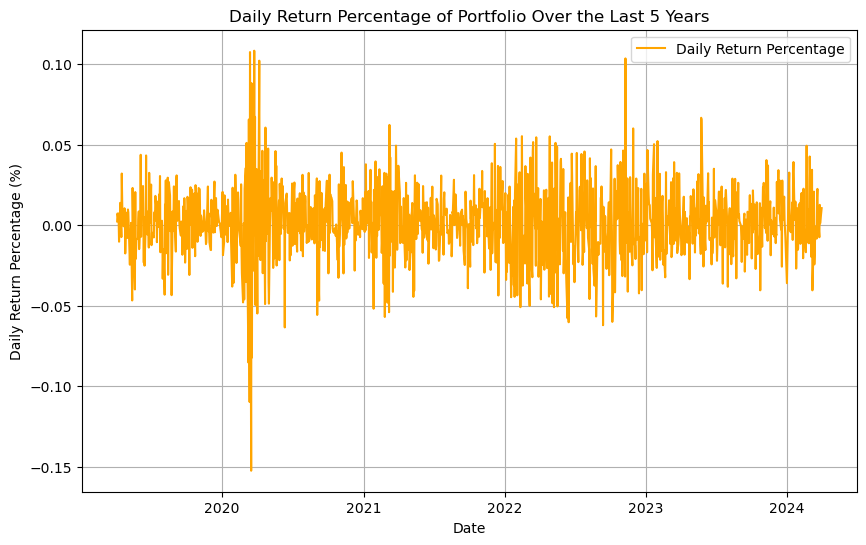

In [3]:
# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Close_Price'].pct_change()

# Plot the daily return percentage for the last 5 years
plt.figure(figsize=(10, 6))
plt.plot(portfolio_df.index, portfolio_df['Daily_Return_Percentage'], label='Daily Return Percentage', color='orange')
plt.title('Daily Return Percentage of Portfolio Over the Last 5 Years')
plt.xlabel('Date')
plt.ylabel('Daily Return Percentage (%)')
plt.legend()
plt.grid(True)

# Save the plot as a JPEG file
plt.savefig('portfolio_daily_return_pct.jpeg', dpi=300, bbox_inches='tight')

plt.show()

#### Here, we compute the daily percentage change in the portfolio's close price and drop any resulting NaN values. This calculation allows us to assess the daily fluctuations in the portfolio's value with respect to its close price. By eliminating NaN values, we ensure consistency in our data for further analysis and interpretation. Below are the first few rows of the updated portfolio DataFrame, reflecting the calculated daily percentage change in the portfolio's close price.

In [4]:
# Calculate daily percentage change in portfolio_close_price
portfolio_df['Daily_Return_Close_Price_Percentage'] = portfolio_df['Portfolio_Close_Price'].pct_change()

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

# Print the latest few rows of the portfolio DataFrame
portfolio_df.tail()

,SOXX,Shares_SOXX,Portfolio_Value,Portfolio_Close_Price,Daily_Return_Percentage,Daily_Return_Close_Price_Percentage
Date,,,,,,
2024-03-25,224.57,1000,224570.01,224.57,-0.003903,-0.003903
2024-03-26,222.88,1000,222880.00,222.88,-0.007525,-0.007525
2024-03-27,225.68,1000,225679.99,225.68,0.012563,0.012563
2024-03-28,225.92,1000,225920.00,225.92,0.001063,0.001063
2024-04-01,228.30,1000,228300.00,228.30,0.010535,0.010535


#### Below are the columns present in the portfolio DataFrame after the calculations. These columns provide comprehensive information about the portfolio's composition and performance, facilitating further analysis and decision-making.

In [5]:
portfolio_df.columns

Index(['SOXX', 'Shares_SOXX', 'Portfolio_Value', 'Portfolio_Close_Price',
       'Daily_Return_Percentage', 'Daily_Return_Close_Price_Percentage'],
      dtype='object')

#### In this segment, we utilize the extract_features function from the tsfresh library to extract features from the portfolio DataFrame. Prior to feature extraction, we reset the index to ensure a unique identifier for each timestamp. The extracted features provide valuable insights into the time series data, enabling further analysis and modeling

In [6]:
from tsfresh import extract_features

# Reset index to have a unique identifier for each timestamp
portfolio_df.reset_index(inplace=True)

# Extract features
extracted_features = extract_features(portfolio_df, column_id='Date')

# Print the extracted features
print(extracted_features.head())

/Users/calvarez/anaconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
Feature Extraction:   0%|          | 0/20 [00:00<?, ?it/s]/Users/calvarez/anaconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for further details. Please upgrade to pyarrow>=14.0.1 or install pyarrow-hotfix to patch your current version.
  warnings.warn(
/Users/calvarez/anaconda3/lib/python3.11/site-packages/dask/dataframe/_pyarrow_compat.py:23: UserWarning: You are using pyarrow version 11.0.0 which is known to be insecure. See https://www.cve.org/CVERecord?id=CVE-2023-47248 for fu

            SOXX__variance_larger_than_standard_deviation  \
2019-04-04                                            0.0   
2019-04-05                                            0.0   
2019-04-08                                            0.0   
2019-04-09                                            0.0   
2019-04-10                                            0.0   

            SOXX__has_duplicate_max  SOXX__has_duplicate_min  \
2019-04-04                      0.0                      0.0   
2019-04-05                      0.0                      0.0   
2019-04-08                      0.0                      0.0   
2019-04-09                      0.0                      0.0   
2019-04-10                      0.0                      0.0   

            SOXX__has_duplicate  SOXX__sum_values  SOXX__abs_energy  \
2019-04-04                  0.0             56.79         3225.1041   
2019-04-05                  0.0             57.20         3271.8400   
2019-04-08                  0.0    

In [7]:
extracted_features.tail()

,SOXX__variance_larger_than_standard_deviation,SOXX__has_duplicate_max,SOXX__has_duplicate_min,SOXX__has_duplicate,SOXX__sum_values,SOXX__abs_energy,SOXX__mean_abs_change,SOXX__mean_change,SOXX__mean_second_derivative_central,SOXX__median,...,Daily_Return_Close_Price_Percentage__fourier_entropy__bins_5,Daily_Return_Close_Price_Percentage__fourier_entropy__bins_10,Daily_Return_Close_Price_Percentage__fourier_entropy__bins_100,Daily_Return_Close_Price_Percentage__permutation_entropy__dimension_3__tau_1,Daily_Return_Close_Price_Percentage__permutation_entropy__dimension_4__tau_1,Daily_Return_Close_Price_Percentage__permutation_entropy__dimension_5__tau_1,Daily_Return_Close_Price_Percentage__permutation_entropy__dimension_6__tau_1,Daily_Return_Close_Price_Percentage__permutation_entropy__dimension_7__tau_1,Daily_Return_Close_Price_Percentage__query_similarity_count__query_None__threshold_0.0,Daily_Return_Close_Price_Percentage__mean_n_absolute_max__number_of_maxima_7
2024-03-25,0.0,0.0,0.0,0.0,224.57,50431.6849,NaN,NaN,NaN,224.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-26,0.0,0.0,0.0,0.0,222.88,49675.4944,NaN,NaN,NaN,222.88,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-27,0.0,0.0,0.0,0.0,225.68,50931.4624,NaN,NaN,NaN,225.68,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-28,0.0,0.0,0.0,0.0,225.92,51039.8464,NaN,NaN,NaN,225.92,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-04-01,0.0,0.0,0.0,0.0,228.30,52120.8900,NaN,NaN,NaN,228.30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Here, we preprocess the extracted features to remove columns with null values and those with zero variance, which might not contribute significantly to the analysis or modeling process. By filtering out such columns, we ensure that only relevant and informative features are retained for further processing.

In [8]:
# Remove columns with null values
extracted_features = extracted_features.dropna(axis=1)

# Remove columns with zero variance
extracted_features = extracted_features.loc[:, extracted_features.std() > 0]

extracted_features.tail()

,SOXX__sum_values,SOXX__abs_energy,SOXX__median,SOXX__mean,SOXX__root_mean_square,SOXX__maximum,SOXX__absolute_maximum,SOXX__minimum,SOXX__benford_correlation,SOXX__quantile__q_0.1,...,"Daily_Return_Close_Price_Percentage__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Daily_Return_Close_Price_Percentage__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","Daily_Return_Close_Price_Percentage__fft_coefficient__attr_""real""__coeff_0","Daily_Return_Close_Price_Percentage__fft_coefficient__attr_""abs""__coeff_0","Daily_Return_Close_Price_Percentage__fft_coefficient__attr_""angle""__coeff_0",Daily_Return_Close_Price_Percentage__value_count__value_0,Daily_Return_Close_Price_Percentage__range_count__max_0__min_-1000000000000.0,Daily_Return_Close_Price_Percentage__range_count__max_1000000000000.0__min_0,Daily_Return_Close_Price_Percentage__count_above__t_0,Daily_Return_Close_Price_Percentage__count_below__t_0
2024-03-25,224.57,50431.6849,224.57,224.57,224.57,224.57,224.57,224.57,0.295657,224.57,...,-0.001071,-0.000757,-0.003903,0.003903,180.0,0.0,1.0,0.0,0.0,1.0
2024-03-26,222.88,49675.4944,222.88,222.88,222.88,222.88,222.88,222.88,0.295657,222.88,...,-0.002064,-0.001459,-0.007525,0.007525,180.0,0.0,1.0,0.0,0.0,1.0
2024-03-27,225.68,50931.4624,225.68,225.68,225.68,225.68,225.68,225.68,0.295657,225.68,...,0.003446,0.002436,0.012563,0.012563,0.0,0.0,0.0,1.0,1.0,0.0
2024-03-28,225.92,51039.8464,225.92,225.92,225.92,225.92,225.92,225.92,0.295657,225.92,...,0.000292,0.000206,0.001063,0.001063,0.0,0.0,0.0,1.0,1.0,0.0
2024-04-01,228.30,52120.8900,228.30,228.30,228.30,228.30,228.30,228.30,0.295657,228.30,...,0.002889,0.002043,0.010535,0.010535,0.0,0.0,0.0,1.0,1.0,0.0


#### To eliminate duplicate columns in the DataFrame, we first transpose it to facilitate identifying duplicates. Then, we remove the duplicated columns and reset the index, ensuring a clean DataFrame without redundant data.

In [9]:
# Transpose the DataFrame to easily identify duplicate columns
transposed_df = extracted_features.T

# Find duplicated columns
duplicated_columns = transposed_df[transposed_df.duplicated()]

# Remove duplicate columns from the original DataFrame
extracted_features = extracted_features.drop(columns=duplicated_columns.index)

# Reset the index of the DataFrame
extracted_features.reset_index(drop=True, inplace=True)

# Print the DataFrame after removing duplicate columns
extracted_features.tail()

,SOXX__sum_values,SOXX__abs_energy,SOXX__benford_correlation,"SOXX__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","SOXX__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","SOXX__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","SOXX__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)",Shares_SOXX__benford_correlation,"Shares_SOXX__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Shares_SOXX__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)",...,Daily_Return_Percentage__root_mean_square,"Daily_Return_Percentage__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","Daily_Return_Percentage__fft_coefficient__attr_""angle""__coeff_0",Daily_Return_Percentage__value_count__value_0,Daily_Return_Percentage__range_count__max_0__min_-1000000000000.0,Daily_Return_Percentage__range_count__max_1000000000000.0__min_0,Daily_Return_Percentage__count_below__t_0
1251,224.57,50431.6849,0.295657,137.726858,87.106114,61.593324,43.553057,0.864123,613.291439,387.879563,...,0.003903,-0.002394,-0.001514,-0.001071,-0.000757,180.0,0.0,1.0,0.0,1.0
1252,222.88,49675.4944,0.295657,136.690396,86.450597,61.129803,43.225299,0.864123,613.291439,387.879563,...,0.007525,-0.004615,-0.002919,-0.002064,-0.001459,180.0,0.0,1.0,0.0,1.0
1253,225.68,50931.4624,0.295657,138.407612,87.536660,61.897766,43.768330,0.864123,613.291439,387.879563,...,0.012563,0.007705,0.004873,0.003446,0.002436,0.0,0.0,0.0,1.0,0.0
1254,225.92,51039.8464,0.295657,138.554802,87.629751,61.963591,43.814875,0.864123,613.291439,387.879563,...,0.001063,0.000652,0.000412,0.000292,0.000206,0.0,0.0,0.0,1.0,0.0
1255,228.30,52120.8900,0.295657,140.014436,88.552904,62.616359,44.276452,0.864123,613.291439,387.879563,...,0.010535,0.006461,0.004086,0.002889,0.002043,0.0,0.0,0.0,1.0,0.0


#### This code calculates the day-to-day percentage change for the 'Portfolio_Value__sum_values' column in the DataFrame 'extracted_features'. It then removes the first row, as it will contain NaN values resulting from the percentage change calculation.

In [10]:
# Calculate percentage change day-to-day for 'Portfolio_Value__sum_values' column
extracted_features['Portfolio_Value__sum_values_pct_change'] = extracted_features['Portfolio_Value__sum_values'].pct_change()

# Drop the first row since it will have NaN for the percentage change
extracted_features = extracted_features.iloc[1:]

# Print the updated DataFrame
extracted_features.tail()

,SOXX__sum_values,SOXX__abs_energy,SOXX__benford_correlation,"SOXX__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","SOXX__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","SOXX__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","SOXX__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)",Shares_SOXX__benford_correlation,"Shares_SOXX__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Shares_SOXX__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)",...,"Daily_Return_Percentage__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)","Daily_Return_Percentage__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)","Daily_Return_Percentage__fft_coefficient__attr_""angle""__coeff_0",Daily_Return_Percentage__value_count__value_0,Daily_Return_Percentage__range_count__max_0__min_-1000000000000.0,Daily_Return_Percentage__range_count__max_1000000000000.0__min_0,Daily_Return_Percentage__count_below__t_0,Portfolio_Value__sum_values_pct_change
1251,224.57,50431.6849,0.295657,137.726858,87.106114,61.593324,43.553057,0.864123,613.291439,387.879563,...,-0.002394,-0.001514,-0.001071,-0.000757,180.0,0.0,1.0,0.0,1.0,-0.003903
1252,222.88,49675.4944,0.295657,136.690396,86.450597,61.129803,43.225299,0.864123,613.291439,387.879563,...,-0.004615,-0.002919,-0.002064,-0.001459,180.0,0.0,1.0,0.0,1.0,-0.007526
1253,225.68,50931.4624,0.295657,138.407612,87.536660,61.897766,43.768330,0.864123,613.291439,387.879563,...,0.007705,0.004873,0.003446,0.002436,0.0,0.0,0.0,1.0,0.0,0.012563
1254,225.92,51039.8464,0.295657,138.554802,87.629751,61.963591,43.814875,0.864123,613.291439,387.879563,...,0.000652,0.000412,0.000292,0.000206,0.0,0.0,0.0,1.0,0.0,0.001063
1255,228.30,52120.8900,0.295657,140.014436,88.552904,62.616359,44.276452,0.864123,613.291439,387.879563,...,0.006461,0.004086,0.002889,0.002043,0.0,0.0,0.0,1.0,0.0,0.010535


In [11]:
extracted_features.columns

Index(['SOXX__sum_values', 'SOXX__abs_energy', 'SOXX__benford_correlation',
       'SOXX__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'SOXX__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
       'SOXX__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
       'SOXX__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
       'Shares_SOXX__benford_correlation',
       'Shares_SOXX__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'Shares_SOXX__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
       'Shares_SOXX__cwt_coefficients__coeff_0__w_10__widths_(2, 5, 10, 20)',
       'Shares_SOXX__cwt_coefficients__coeff_0__w_20__widths_(2, 5, 10, 20)',
       'Portfolio_Value__sum_values', 'Portfolio_Value__abs_energy',
       'Portfolio_Value__benford_correlation',
       'Portfolio_Value__cwt_coefficients__coeff_0__w_2__widths_(2, 5, 10, 20)',
       'Portfolio_Value__cwt_coefficients__coeff_0__w_5__widths_(2, 5, 10, 20)',
       'Por

#### This code segment splits extracted data via TSFRESH into features and target variables, trains a linear regression model on the features, and then generates future features for the next 30 days. Finally, it predicts the daily percentage change in 'Portfolio_Value__sum_values' for each of the next 30 days using the trained model.

In [12]:
from sklearn.linear_model import LinearRegression
import numpy as np
import pandas as pd

# 1. Split the data into features (X) and target variable (y)
X = extracted_features.drop(columns=['Portfolio_Value__sum_values_pct_change'])
y = extracted_features['Portfolio_Value__sum_values_pct_change']

# 2. Train a linear regression model
model = LinearRegression()
model.fit(X, y)

# 3. Generate future features for the next 30 days
next_30_days_features = pd.DataFrame(index=range(30), columns=X.columns)
next_30_days_features.iloc[0] = extracted_features.drop(columns=['Portfolio_Value__sum_values_pct_change']).iloc[-1]

for i in range(1, 30):
    # Randomly generate features for the next day
    random_features = np.random.rand(1, len(next_30_days_features.columns))
    
    # Assign the randomly generated features to the ith row of next_30_days_features
    next_30_days_features.iloc[i] = random_features

# 4. Use the trained model to predict the 30-day percentage change in 'Portfolio_Value__sum_values'
future_pct_change_predictions = model.predict(next_30_days_features)
print("Future Predictions for the next 30 days:")
print(future_pct_change_predictions)















Future Predictions for the next 30 days:
[0.01053528 0.90307561 0.65638349 0.4864989  0.83941061 0.45270963
 1.25258539 0.65438861 0.51603693 0.53829986 0.90230183 0.6291142
 0.53608216 0.3233037  0.20647643 0.99217927 0.53005763 0.79521453
 0.89293391 0.51817318 1.01933219 1.02953123 0.9750513  0.96030416
 0.66760056 1.06721975 0.22962211 0.88083728 0.61237068 0.70248093]


In [13]:
# Convert predictions array to DataFrame
future_predictions_df = pd.DataFrame(future_pct_change_predictions, index=range(30), columns=['Predicted_Pct_Change'])

# Save DataFrame as CSV
future_predictions_df.to_csv('TSFRESH_LR.csv')

print("Future Predictions for the next 30 days:")
future_predictions_df.tail(30)

Future Predictions for the next 30 days:


,Predicted_Pct_Change
0,0.010535
1,0.903076
2,0.656383
3,0.486499
4,0.839411
5,0.452710
6,1.252585
7,0.654389
8,0.516037
9,0.538300


#### Linear regression model trained on historical data predicts daily percentage change in 'Portfolio_Value__sum_values' for the next 30 days using engineered features. Performance metrics such as R^2 score, RMSE, and MAE are evaluated on a test set from historical data to assess model accuracy

In [41]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Split the historical data into training and testing sets
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compute R^2 score
r2 = r2_score(y_test, y_pred)

# Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# Compute MAE
mae = mean_absolute_error(y_test, y_pred)

print("R^2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)
print("Future Predictions for the next 30 days:")
print(future_pct_change_predictions)

# Save output as a text file
with open('TSFRESH_LR.txt', 'w') as f:
    f.write("R^2 Score: {}\n".format(r2))
    f.write("RMSE: {}\n".format(rmse))
    f.write("MAE: {}\n".format(mae))
    f.write("Future Predictions for the next 30 days:\n")
    for prediction in future_pct_change_predictions:
        f.write(str(prediction) + '\n')

KeyError: 'ds'

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# 1. Split the data into features (X) and target variable (y)
X = extracted_features.drop(columns=['Portfolio_Value__sum_values_pct_change'])
y = extracted_features['Portfolio_Value__sum_values_pct_change']

# 2. Train a Random Forest regressor model
model = RandomForestRegressor()
model.fit(X, y)

# 3. Generate future features for the next 30 days
next_30_days_features = pd.DataFrame(index=range(30), columns=X.columns)

# Fill in the first row of next_30_days_features with the last available features
next_30_days_features.iloc[0] = extracted_features.drop(columns=['Portfolio_Value__sum_values_pct_change']).iloc[-1]

# Generate features for the next 29 days
for i in range(1, 30):
    # Randomly generate features for the next day
    random_features = np.random.rand(1, len(next_30_days_features.columns))
    
    # Assign the randomly generated features to the ith row of next_30_days_features
    next_30_days_features.iloc[i] = random_features

# 4. Use the trained model to predict the 30-day percentage change in 'Portfolio_Value__sum_values'
future_pct_change_predictions = model.predict(next_30_days_features)

# 5. Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Make predictions on the testing set
y_pred = model.predict(X_test)

# 7. Compute R^2 score
r2 = r2_score(y_test, y_pred)

# 8. Compute RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

# 9. Compute MAE
mae = mean_absolute_error(y_test, y_pred)

print("R^2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

print("Future Predictions for the next 30 days using Random Forest:")
print(future_pct_change_predictions)


R^2 Score: 0.9998942747514907
RMSE: 0.00022926046335644353
MAE: 4.403106588755983e-05
Future Predictions for the next 30 days using Random Forest:
[0.01052009 0.09597423 0.09003547 0.08579859 0.09612917 0.09612917
 0.09685682 0.09701177 0.09597423 0.09685682 0.09597423 0.09573446
 0.07690788 0.09612917 0.09701177 0.09373631 0.09701177 0.08400619
 0.09701177 0.09701177 0.09597423 0.09612917 0.09603556 0.09581902
 0.08785513 0.09685682 0.09701177 0.09701177 0.09091288 0.09612917]


In [18]:
# Convert future predictions array to DataFrame
future_predictions_df = pd.DataFrame(future_pct_change_predictions, columns=['Predicted_Pct_Change'])

# Save DataFrame to CSV
future_predictions_df.to_csv('TSFRESH_RF.csv', index=False)

In [19]:
# Save output as a text file
with open('TSFRESH_RF.txt', 'w') as f:
    f.write("R^2 Score: {}\n".format(r2))
    f.write("RMSE: {}\n".format(rmse))
    f.write("MAE: {}\n".format(mae))
    f.write("Future Predictions for the next 30 days using Random Forest:\n")
    for prediction in future_pct_change_predictions:
        f.write(str(prediction) + '\n')


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Split the data into features (X) and target variable (y)
X = extracted_features.drop(columns=['Portfolio_Value__sum_values_pct_change'])
y = extracted_features['Portfolio_Value__sum_values_pct_change']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Gradient Boosting regressor model
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Compute evaluation metrics
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("Evaluation Metrics:")
print("R^2 Score:", r2)
print("RMSE:", rmse)
print("MAE:", mae)

# Predict the 30-day percentage change in 'Portfolio_Value__sum_values'
future_pct_change_predictions = model.predict(next_30_days_features)

print("\nFuture Predictions for the next 30 days using Gradient Boosting:")
print(future_pct_change_predictions)


Evaluation Metrics:
R^2 Score: 0.999824377711951
RMSE: 0.0002954810434325211
MAE: 0.00020589675967066641

Future Predictions for the next 30 days using Gradient Boosting:
[0.01044617 0.1066863  0.0984421  0.09436569 0.1066863  0.1066863
 0.1066863  0.1066863  0.1066863  0.1066863  0.1066863  0.10195432
 0.07495422 0.1066863  0.1066863  0.10246703 0.1066863  0.08789542
 0.1066863  0.1066863  0.1066863  0.1066863  0.10572275 0.10640556
 0.10346032 0.1066863  0.1066863  0.1066863  0.10361774 0.1066863 ]


In [21]:
# Open a text file for writing
with open('TSRESH_GB.txt', 'w') as f:
    # Write the evaluation metrics to the file
    f.write("Evaluation Metrics:\n")
    f.write("R^2 Score: {}\n".format(r2))
    f.write("RMSE: {}\n".format(rmse))
    f.write("MAE: {}\n".format(mae))

In [22]:
# Store future predictions in a DataFrame
future_predictions_df = pd.DataFrame({'Future_Predictions': future_pct_change_predictions})

# Save future predictions DataFrame to CSV
future_predictions_df.to_csv('TSFRESH_GB.csv', index=False)

### In this code segment, the dataset is split into training and testing sets for machine learning model training and evaluation. The steps involved are:

#### Defining Testing Days:
Testing days are defined as every 5th day within the dataset's time range. This periodic interval ensures a balanced distribution of data for testing.

#### Splitting Data:
The dataset is split into two subsets: training data and testing data.
Training data (train_df) consists of observations not included in the defined testing days, ensuring temporal separation.
Testing data (test_df) comprises observations occurring on the specified testing days.

#### Preparing Data for Machine Learning:
Features (X_train and X_test) and target variables (y_train and y_test) are extracted from the training and testing subsets, respectively.
Features include Previous_Return, Rolling_Mean, and Rolling_Std, representing the previous return percentage and rolling statistics calculated earlier.


In [23]:
import pandas as pd
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
import numpy as np


# Feature Extraction
portfolio_df['Previous_Return'] = portfolio_df['Daily_Return_Percentage'].shift(1)
portfolio_df['Rolling_Mean'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).mean()
portfolio_df['Rolling_Std'] = portfolio_df['Daily_Return_Percentage'].rolling(window=7).std()

# Drop NaN values resulting from rolling calculations and lagged values
portfolio_df.dropna(inplace=True)

# Define the testing days (every 5th day)
testing_days = portfolio_df.index[::5]

# Split data into training and testing sets based on testing days
train_df = portfolio_df[~portfolio_df.index.isin(testing_days)]
test_df = portfolio_df[portfolio_df.index.isin(testing_days)]

# Prepare data for machine learning
X_train = train_df[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y_train = train_df['Daily_Return_Percentage']
X_test = test_df[['Previous_Return', 'Rolling_Mean', 'Rolling_Std']]
y_test = test_df['Daily_Return_Percentage']


In [24]:
portfolio_df

,Date,SOXX,Shares_SOXX,Portfolio_Value,Portfolio_Close_Price,Daily_Return_Percentage,Daily_Return_Close_Price_Percentage,Previous_Return,Rolling_Mean,Rolling_Std
6,2019-04-12,57.92,1000,57918.05,57.92,0.013828,0.013828,-0.000700,0.003172,0.007607
7,2019-04-15,57.49,1000,57487.77,57.49,-0.007424,-0.007424,0.013828,0.001783,0.008614
8,2019-04-16,59.33,1000,59328.53,59.33,0.032006,0.032006,-0.007424,0.005324,0.014383
9,2019-04-17,60.31,1000,60311.58,60.31,0.016518,0.016518,0.032006,0.007359,0.014879
10,2019-04-18,60.32,1000,60320.13,60.32,0.000166,0.000166,0.016518,0.008853,0.013247
...,...,...,...,...,...,...,...,...,...,...
1251,2024-03-25,224.57,1000,224570.01,224.57,-0.003903,-0.003903,0.001199,0.002925,0.012074
1252,2024-03-26,222.88,1000,222880.00,222.88,-0.007525,-0.007525,-0.003903,0.002876,0.012123
1253,2024-03-27,225.68,1000,225679.99,225.68,0.012563,0.012563,-0.007525,0.004781,0.012496
1254,2024-03-28,225.92,1000,225920.00,225.92,0.001063,0.001063,0.012563,0.006131,0.011290


#### Model Training:
A linear regression model is instantiated and trained using the training data (X_train and y_train).

#### Model Evaluation:
The trained model's performance is evaluated using the testing data (X_test and y_test).
The R^2 score, indicating the proportion of variance explained by the model, is calculated.
The Mean Absolute Error (MAE), representing the average absolute difference between predicted and actual values, is computed.

#### Future Prediction:
Features for the next 30 days are generated, starting from the last available features in the training data.
Predictions for the future daily return percentages over the next 30 days are made using the trained linear regression model.
This process provides insights into the model's performance on unseen data and enables the forecasting of future portfolio performance based on historical trends and learned relationships

In [25]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score, mean_absolute_error

# Train linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Calculate R^2 score
r2_score = model.score(X_test, y_test)
print("R^2 Score:", r2_score)

# Evaluate model
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# Predict future daily return percentages for the next 30 days
last_features = X_train.tail(1)
next_30_days = pd.date_range(start=portfolio_df.index[-1], periods=30, freq='D')
future_features = pd.DataFrame(index=next_30_days, columns=X_train.columns)
future_features.iloc[0] = last_features.values[0]

for i in range(1, 30):
    future_features.iloc[i] = np.concatenate(([future_features.iloc[i - 1][0]], np.random.rand(2)))

future_predictions = model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(future_predictions)

R^2 Score: 0.14397099051340656
Mean Absolute Error: 0.013753765658088899
Root Mean Squared Error: 0.018620290517289445
Future Predictions for the next 30 days:
[0.00523091 0.28189171 0.63704462 1.26891092 0.82281562 0.81631885
 0.37529084 0.54684813 1.39319449 0.64394301 0.35975051 0.24283868
 0.09699608 0.41253378 0.27314983 0.16754653 0.72015669 0.85713741
 0.7522341  0.58097444 0.36473642 0.71563217 0.77643085 0.53417323
 0.47420061 0.9150208  1.22633359 0.3022153  1.0817515  0.9563378 ]


/var/folders/yl/5xqpmy654v72wrc2y_mxtlnm0000gn/T/ipykernel_10521/444779097.py:28: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  future_features.iloc[i] = np.concatenate(([future_features.iloc[i - 1][0]], np.random.rand(2)))


In [26]:
# Create DataFrame for future predictions
future_predictions_df = pd.DataFrame({'Future_Predictions': future_predictions}, index=next_30_days)

# Save future predictions DataFrame to CSV
future_predictions_df.to_csv('SIMP_EXTRACT_LR.csv')

In [27]:
# Open a text file for writing
with open('SIMP_EXTRACT_LR.txt', 'w') as f:
    # Write the evaluation metrics to the file
    f.write("R^2 Score: {}\n".format(r2_score))
    f.write("Mean Absolute Error: {}\n".format(mae))
    f.write("Root Mean Squared Error: {}\n".format(rmse))

### This code segment utilizes Facebook's Prophet library to forecast the future performance of the portfolio. The process involves the following steps:

#### Daily Percentage Change Calculation:

Daily percentage change in portfolio value is calculated based on the Portfolio_Value column of the DataFrame.

#### Data Preparation for Prophet:

NaN values resulting from the calculation are dropped to ensure data consistency.
The DataFrame is prepared in a format suitable for Prophet, consisting of two columns: ds (date) and y (daily return percentage).

#### Model Fitting:

A Prophet model is instantiated and fitted using the prepared DataFrame.

#### Future Date Generation:

A DataFrame with future dates for the next 30 days is created using the make_future_dataframe method.

#### Prediction:

Using the fitted model, predictions are made for the future performance of the portfolio over the next 30 days.
The predicted values are extracted from the forecast DataFrame.

In [28]:
from prophet import Prophet

# Calculate daily percentage change in portfolio value
portfolio_df['Daily_Return_Percentage'] = portfolio_df['Portfolio_Value'].pct_change() * 100

# Drop NaN values resulting from the calculation
portfolio_df.dropna(inplace=True)

# Prepare data for Prophet
prophet_df = portfolio_df.reset_index()[['Date', 'Daily_Return_Percentage']].rename(columns={'Date': 'ds', 'Daily_Return_Percentage': 'y'})

# Fit the Prophet model
model = Prophet()
model.fit(prophet_df)

# Create a DataFrame with future dates for the next 30 days
future_dates = model.make_future_dataframe(periods=30)

# Make predictions using the fitted model
forecast = model.predict(future_dates)

# Extract the predicted values for the next 30 days
predicted_values = forecast[['ds', 'yhat']].tail(30)


14:09:30 - cmdstanpy - INFO - Chain [1] start processing
14:09:30 - cmdstanpy - INFO - Chain [1] done processing


In [29]:
# Display predicted return percentage values for the next 30 days (Prophet)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

,ds,yhat,yhat_lower,yhat_upper
1249,2024-04-02,0.439620,-2.685156,3.254360
1250,2024-04-03,0.313520,-2.504652,3.033089
1251,2024-04-04,0.439539,-2.443929,3.164778
1252,2024-04-05,0.165919,-2.690842,3.155241
1253,2024-04-06,-0.245895,-2.945700,2.800204
1254,2024-04-07,-0.282482,-3.026141,2.510104
1255,2024-04-08,0.273634,-2.608249,3.166623
1256,2024-04-09,0.202830,-2.487985,2.960143
1257,2024-04-10,0.065679,-2.724611,3.107079
1258,2024-04-11,0.184665,-2.699942,3.210905


In [30]:
# Extract the relevant columns from the forecast and select the last 30 rows
forecast_df = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(30)

# Save the DataFrame to CSV
forecast_df.to_csv('PROPHET_PORTFOLIO.csv', index=False)

### In this section, predictions from both the linear regression model and the Prophet model are combined for comparison. The following steps are undertaken:

#### Conversion to DataFrame:

Predictions from the linear regression model (future_predictions) are converted into a DataFrame (future_predictions_df) with column name 'LR_Predictions'.

#### Concatenation:

The Prophet predictions DataFrame (predicted_values) and the linear regression predictions DataFrame are concatenated along the columns axis to create a combined predictions DataFrame (combined_predictions_df).

#### Index Alignment:

The index of the linear regression predictions DataFrame is set to match the index of the Prophet predictions DataFrame for alignment.

#### Displaying Combined Predictions:

The combined predictions DataFrame is displayed, providing a comparative view of predictions from both models over the next 30 days.

In [31]:
# Convert the future_predictions array to a DataFrame
future_predictions_df = pd.DataFrame(future_predictions, columns=['LR_Predictions'])

# Concatenate the Prophet predictions DataFrame with the future predictions DataFrame
combined_predictions_df = pd.concat([predicted_values, future_predictions_df], axis=1)

# Set the index of the future_predictions_df DataFrame to match the index of the predicted_values DataFrame
future_predictions_df.index = predicted_values.index

# Concatenate the Prophet predictions DataFrame with the future predictions DataFrame
combined_predictions_df = pd.concat([predicted_values, future_predictions_df], axis=1)

# Print the combined predictions DataFrame
combined_predictions_df.tail(30)


,ds,yhat,LR_Predictions
1249,2024-04-02,0.439620,0.005231
1250,2024-04-03,0.313520,0.281892
1251,2024-04-04,0.439539,0.637045
1252,2024-04-05,0.165919,1.268911
1253,2024-04-06,-0.245895,0.822816
1254,2024-04-07,-0.282482,0.816319
1255,2024-04-08,0.273634,0.375291
1256,2024-04-09,0.202830,0.546848
1257,2024-04-10,0.065679,1.393194
1258,2024-04-11,0.184665,0.643943


### This code segment employs a Random Forest Regression model to predict the future performance of the portfolio. The process involves the following steps:

#### Model Initialization:

A Random Forest Regression model is instantiated with 100 estimators and a random state of 42.

#### Model Training:

The model is trained using the training data (X_train and y_train).

#### Model Evaluation:

The model's performance is evaluated using the testing data to calculate the R^2 score and Mean Absolute Error (MAE), providing insights into its accuracy and reliability.

#### Future Prediction:

Predictions for the future daily return percentages over the next 30 days are made using the trained Random Forest Regression model (rf_model) and the generated future features.

#### This approach offers an alternative regression-based method for forecasting portfolio performance, allowing for comparison with previous linear regression and Prophet models

In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Initialize Random Forest Regression model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Calculate the R^2 score of the model on the testing data
r2_score_rf = rf_model.score(X_test, y_test)
print("R^2 Score:", r2_score_rf)

# Evaluate the model
y_pred_rf = rf_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))
print("Root Mean Squared Error:", rmse)

# Make predictions for future dates
rf_predictions = rf_model.predict(future_features)
print("Future Predictions for the next 30 days:")
print(rf_predictions)


R^2 Score: 0.004846847426459133
Mean Absolute Error: 0.013753765658088899
Root Mean Squared Error: 0.020076461623588525
Future Predictions for the next 30 days:
[0.00348375 0.00849611 0.00849611 0.00849611 0.00849611 0.00849611
 0.00849611 0.00849611 0.00849611 0.00849611 0.00849611 0.02577759
 0.01694146 0.00849611 0.00849611 0.00849611 0.00849611 0.00849611
 0.00849611 0.00849611 0.00849611 0.00849611 0.00849611 0.00849611
 0.00849611 0.00849611 0.00849611 0.00849611 0.00849611 0.00849611]


In [33]:
# Create a DataFrame for the future predictions
future_predictions_df = pd.DataFrame({'Future_Predictions': rf_predictions}, index=next_30_days)

# Save the DataFrame to CSV
future_predictions_df.to_csv('SIMP_EXTRACT_RF.csv')

In [34]:
# Open a text file for writing
with open('SIMP+EXTRACT_RF.txt', 'w') as f:
    # Write the evaluation metrics to the file
    f.write("R^2 Score: {}\n".format(r2_score_rf))
    f.write("Mean Absolute Error: {}\n".format(mae))
    f.write("Root Mean Squared Error: {}\n".format(rmse))

### In this section, predictions from the Random Forest Regression model are incorporated alongside the predictions from the linear regression and Prophet models. 

In [35]:
# Convert the future_predictions array to a DataFrame for Random Forest predictions
rf_predictions_df = pd.DataFrame(rf_predictions, index=future_predictions_df.index, columns=['RF_Predictions'])

# Concatenate the Prophet predictions DataFrame with the Random Forest predictions DataFrame
combined_predictions_df = pd.concat([combined_predictions_df, rf_predictions_df], axis=1)

# Print the updated combined predictions DataFrame
combined_predictions_df.tail(30)

combined_predictions_df.to_csv('combined_predictions_A.csv')

In [36]:
combined_predictions_df.to_csv('combined_predictions_B.csv')

In [37]:
print("30 day predictions and score using M-F")

print("R^2 Score (Linear Regression)", r2_score)

print("R^2 Score (Random Forest):", r2_score_rf)

display(combined_predictions_df.tail(30))


30 day predictions and score using M-F
R^2 Score (Linear Regression) 0.14397099051340656
R^2 Score (Random Forest): 0.004846847426459133


,ds,yhat,LR_Predictions,RF_Predictions
1970-01-01 00:00:00.000001255,NaT,NaN,NaN,0.003484
1970-01-02 00:00:00.000001255,NaT,NaN,NaN,0.008496
1970-01-03 00:00:00.000001255,NaT,NaN,NaN,0.008496
1970-01-04 00:00:00.000001255,NaT,NaN,NaN,0.008496
1970-01-05 00:00:00.000001255,NaT,NaN,NaN,0.008496
1970-01-06 00:00:00.000001255,NaT,NaN,NaN,0.008496
1970-01-07 00:00:00.000001255,NaT,NaN,NaN,0.008496
1970-01-08 00:00:00.000001255,NaT,NaN,NaN,0.008496
1970-01-09 00:00:00.000001255,NaT,NaN,NaN,0.008496
1970-01-10 00:00:00.000001255,NaT,NaN,NaN,0.008496


In [38]:
# Load the CSV file into a DataFrame
loaded_df = pd.read_csv('combined_predictions_A.csv', index_col=0)

In [39]:
loaded_df.head()

,ds,yhat,LR_Predictions,RF_Predictions
1249,2024-04-02,0.439620,0.005231,NaN
1250,2024-04-03,0.313520,0.281892,NaN
1251,2024-04-04,0.439539,0.637045,NaN
1252,2024-04-05,0.165919,1.268911,NaN
1253,2024-04-06,-0.245895,0.822816,NaN
